In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size for your plots
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Enable inline plotting in Jupyter Notebook
%matplotlib inline


### Loading the dataset

In [6]:
df = pd.read_csv('headbrain.csv')
df.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


### Choosing the dependent and independent variables

In [9]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

## Linear Regression Using least square method

### Calculating the slope and constant value

In [12]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0

for i in range(n):
    numer+= (X[i]-mean_x)*(Y[i]-mean_y)
    denom+= (X[i]-mean_x)**2
    
b1 = numer/denom
b0 = mean_y - (b1*mean_x)

b0,b1

(325.57342104944223, 0.26342933948939945)

### Plotting the values and regression line

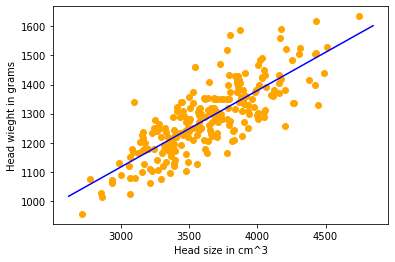

In [16]:
max_x = np.max(X)+100
min_x = np.min(X)-100

x = np.linspace(min_x,max_x,1000)
y = b1*x+b0

plt.plot(x,y,color="blue",label="Regression Line")
plt.scatter(X,Y,color="orange",label="Scatter Plot")

plt.xlabel("Head size in cm^3")
plt.ylabel("Head wieght in grams")
plt.legend
plt.show()

### Model Good Fit

In [19]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1-(ss_r/ss_t)
r2

0.6393117199570003

## Linear Regression using scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n,1))
#Creating the model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)

In [26]:
#Calculating RMSE and R2 Score
mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,Y)

In [27]:
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
